In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# from scipy.stats import norm

# import tensorflow as tf
# import tensorflow_probability as tfp

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [22]:
np.random.seed(1234)

T       = 65-21+1   # number of periods: 21-65
# T = 20
n_draw  = 1000      # number of simulations
ρ       = .03       # income growth trend
# σ       = .1        # income growth s.d.
σ       = .1       

p       = .5        # probability of income being high/low
y       = 1      # intial value of income
yh      = ((1+ρ)*y+.1*np.sqrt(2/np.pi))    # income high
yl      = ((1+ρ)*y-.1*np.sqrt(2/np.pi))    # income low

γ      = 3          # risk aversion coef 
δ      = .98        # hyperbolic discounting δ
β      = .8         # hyperbolic discounting β
# β      = 1
# α      = 1.5        # demand for liquid asset
α      = .015
# α      = 0

Rs     = 1+.072     # annual saving interest
Rb     = 1+.197     # annual credit card interest

In [23]:
y_eps = (np.random.randint(2,size=T)*2-1)*σ/np.sqrt(2*np.pi)
# y_eps

In [24]:
y_pro = np.ones(T)
# y_pro[T-1] = 1000
# for t in range(T-1,0,-1):
#     y_pro[t-1] = (y_pro[t]-y_eps[t])/(1+ρ)
# y_pro = y_pro/y_pro[0]

# y_pro[0] = 1
for t in range(1,T):
    y_pro[t] = (1+ρ)*y_pro[t-1] + y_eps[t-1]
# y_pro = y_pro/y_pro[0]
# y_pro

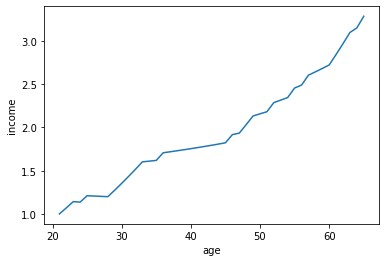

In [25]:
plt.plot([x for x in range(21,T+21)], y_pro)
plt.xlabel('age')
plt.ylabel('income');

In [26]:
y_high = y_pro
y_high[1:] = y_pro[:-1]+σ/np.sqrt(2*np.pi)

y_low = y_pro
y_low[1:]  = y_pro[:-1]-σ/np.sqrt(2*np.pi)

In [27]:
# N_grid_a   = 50    # size of saving grid
# N_grid_b   = 50    # size of debt grid

N_grid_a   = 20    
N_grid_b   = 20  

N_grid_tot = N_grid_a*N_grid_b

# # ave income at age 38: 1.8 *10k
# y_s = np.linspace(.8, 2.8, N_grid_a)

# a_grid = 1.8/y_s            # savings grid
# a_grid.sort()

# # mean(range) log(1+b/y) from data: .25 (.05, .6)  
# b_y = np.linspace(-4.6, -0.6, N_grid_b-1)

# b_grid = np.exp(b_y)*1.8    # debt grid
# b_grid.sort()

# b_grid = np.insert(b_grid, 0, 0)

# a_grid = np.linspace(.1, 10, N_grid_a)
# b_grid = np.linspace(0, 2, N_grid_b)

# a_grid = np.linspace(.1, 10, N_grid_a)
# b_grid = np.linspace(0, 10, N_grid_b)

a_grid = np.linspace(.1, 4, N_grid_a)
b_grid = np.linspace(0, 3.9, N_grid_b)

# # print(s_grid)
# # print(b_grid)

# cartesian product of a_grid and b_grid
ab_mat = np.array([[a,b] for a in a_grid for b in b_grid])    # 2500 * 2 (a, b)

# consumption and debt matrices for current period
a0 = np.repeat(np.repeat(a_grid,N_grid_b),N_grid_tot).reshape(N_grid_tot,N_grid_tot)
b0 = np.repeat(np.tile(b_grid,N_grid_a),N_grid_tot).reshape(N_grid_tot,N_grid_tot)

# consumption and debt matrices for next period
a1 = np.tile(np.repeat(a_grid,N_grid_b),N_grid_tot).reshape(N_grid_tot,N_grid_tot)
b1 = np.tile(np.tile(b_grid,N_grid_a),N_grid_tot).reshape(N_grid_tot,N_grid_tot)

In [28]:
# initialize of consumption and policy matrices

# ct_mat       = np.zeros((N_grid_tot, N_grid_tot))    # 2500*2500
# ct_mat2     = np.zeros((N_grid_tot, N_grid_tot))    # 2500*2500
# ct_mat0     = np.zeros((N_grid_tot, N_grid_tot))    # 2500*2500

# ct_mat2h     = np.zeros((N_grid_tot, N_grid_tot))    # 2500*2500
# ct_mat2l     = np.zeros((N_grid_tot, N_grid_tot))    # 2500*2500

# ct_mat0h     = np.zeros((N_grid_tot, N_grid_tot))    # 2500*2500
# ct_mat0l     = np.zeros((N_grid_tot, N_grid_tot))    # 2500*2500

ct_mat          = np.zeros((T, N_grid_tot, N_grid_tot))    # 2500*2500
ct_mat_high     = np.zeros((T, N_grid_tot, N_grid_tot))    # 2500*2500
ct_mat_low      = np.zeros((T, N_grid_tot, N_grid_tot))    # 2500*2500


# V_tuple      = np.zeros((N_grid_tot, N_grid_tot))    # 2500*2500
pol_func_a   = np.zeros((N_grid_tot, T))*np.nan      # 2500*24
pol_func_b   = np.zeros((N_grid_tot, T))*np.nan      # 2500*24
pol_func_c   = np.zeros((N_grid_tot, T))*np.nan      # 2500*24

# pol_func_ah   = np.zeros((N_grid_tot, T+1))*np.nan      # 2500*24
# pol_func_bh   = np.zeros((N_grid_tot, T+1))*np.nan      # 2500*24
# pol_func_ch   = np.zeros((N_grid_tot, T+1))*np.nan      # 2500*24

# pol_func_al   = np.zeros((N_grid_tot, T+1))*np.nan      # 2500*24
# pol_func_bl   = np.zeros((N_grid_tot, T+1))*np.nan      # 2500*24
# pol_func_cl   = np.zeros((N_grid_tot, T+1))*np.nan      # 2500*24

# final optimal policy vectors
pol_a = np.zeros(N_grid_tot)
pol_b = np.zeros(N_grid_tot)
pol_c = np.zeros(N_grid_tot)

# pol_ah = np.zeros(N_grid_tot)
# pol_bh = np.zeros(N_grid_tot)
# pol_ch = np.zeros(N_grid_tot)

# pol_al = np.zeros(N_grid_tot)
# pol_bl = np.zeros(N_grid_tot)
# pol_cl = np.zeros(N_grid_tot)

# VT           = np.tile(a_grid.T,(N_grid_tot, 1))     # 2500*2500
# Vt           = np.tile(a_grid,(1, N_grid_tot))       # 2500*2500
#Vt           = np.tile(a_grid.T,(N_grid_tot,1)

v_vals  = np.zeros((T, N_grid_tot,N_grid_tot))
vls     = np.zeros((T, N_grid_tot,N_grid_tot))
vhs     = np.zeros((T, N_grid_tot,N_grid_tot))

In [29]:
# # backout consumption according to intertemporal budget constraint
# # c = ( a- a'-y-b' + Rb b)/Rs
# # c = a+y-(a'-b'+Rb b)/Rs

# for j in range(N_grid_tot): # compute c for every control (a,b) for every (a',b') state
    
#     # last period where b'==0: c = a-(a' + Rb b)/Rs
#     ct_mat[:,j] = ab_mat[:,0] - (ab_mat[j,0] + Rb * ab_mat[:,1])/Rs

#     # middle: c = a-(a'-y'-b' + Rb b)/Rs
#     ct_mat2h[:,j] = ab_mat[:,0] + yh/10 - (ab_mat[j,0] - ab_mat[j,1] + Rb * ab_mat[:,1])/Rs
#     ct_mat2l[:,j] = ab_mat[:,0] + yl/10 - (ab_mat[j,0] - ab_mat[j,1] + Rb * ab_mat[:,1])/Rs
    
#     # first period where b==0: c = a-(a'-y'-b')/Rs
# #     ct_mat0h[:,j] = ab_mat[:,0] + yh/10 - (ab_mat[j,0] - ab_mat[j,1] )/Rs
# #     ct_mat0l[:,j] = ab_mat[:,0] + yl/10 - (ab_mat[j,0] - ab_mat[j,1] )/Rs
#     ct_mat0h[:,j] = ab_mat[:,0] + yh/10 - (ab_mat[j,0] - ab_mat[j,1] + Rb * ab_mat[:,1])/Rs
#     ct_mat0l[:,j] = ab_mat[:,0] + yl/10 - (ab_mat[j,0] - ab_mat[j,1] + Rb * ab_mat[:,1])/Rs
    
    
# # trim consumptions < 0
# ct_mat[ct_mat<0] = np.nan
# ct_mat2h[ct_mat2h<0] = np.nan
# ct_mat2l[ct_mat2l<0] = np.nan
# ct_mat0h[ct_mat0h<0] = np.nan
# ct_mat0l[ct_mat0l<0] = np.nan

# # ct_mat[ct_mat<0] = 0
# # ct_mat2h[ct_mat2h<0] = 0
# # ct_mat2l[ct_mat2l<0] = 0
# # ct_mat0h[ct_mat0h<0] = 0
# # ct_mat0l[ct_mat0l<0] = 0

In [30]:
# backout consumption according to intertemporal budget constraint
# c = ( a- a'-y-b' + Rb b)/Rs
# c = a+y-(a'-b'+Rb b)/Rs

# last period where b'==0: c = a + y - (a' + Rb b)/Rs
ct_mat[-1,:,:]      = a0 + y_pro[-1]/10  - (a1 + Rb * b0)/Rs
ct_mat_high[-1,:,:] = a0 + y_high[-1]/10 - (a1 + Rb * b0)/Rs
ct_mat_low[-1,:,:]  = a0 + y_low[-1]/10  - (a1 + Rb * b0)/Rs

# first period where b==0: c = a + y -(a'-b')/Rs
ct_mat[0,:,:]      = a0 + y_pro[0]/10  - (a1 - b1 )/Rs
ct_mat_high[0,:,:] = a0 + y_high[0]/10 - (a1 - b1 )/Rs
ct_mat_low[0,:,:]  = a0 + y_low[0]/10  - (a1 - b1 )/Rs

# middle: c = a + y -(a' -b' + Rb b)/Rs
for t in range(1,T-1):
    ct_mat[t,:,:]      = a0 + y_pro[t]/10  - (a1 - b1 + Rb * b0)/Rs
    ct_mat_high[t,:,:] = a0 + y_high[t]/10 - (a1 - b1 + Rb * b0)/Rs
    ct_mat_low[t,:,:]  = a0 + y_low[t]/10  - (a1 - b1 + Rb * b0)/Rs

# trim consumptions < 0
ct_mat[ct_mat<0] = np.nan
ct_mat_high[ct_mat_high<0] = np.nan
ct_mat_low[ct_mat_low<0] = np.nan

In [31]:
def u(x) :
    return (x**(1-γ)-10)/(1-γ)

In [32]:
# Intialize v values after retirement

# v_valsh     =u(a1)    
# v_vals1h    =u(a1)
# v_valsl     =u(a1)    
# v_vals1l    =u(a1)

v_vals_old =20*u(a1/20)

# vT = u(a1)
# vls[-1,:,:] = u(a1)
# vhs[-1,:,:] = u(a1)

$V = \max u(c)+ u(\alpha a)+\beta \delta E[V'] = \max \frac{c^{1-\gamma}}{1-\gamma}+\frac{ (\alpha a)^{1-\gamma}}{1-\gamma}+\beta \delta E[V']$

In [33]:
def _nanargmax(arr, axis=None):
    try:
        return np.nanargmax(arr, axis)
    except ValueError:
        return np.nan

In [34]:
# # Period T: just before retirement
# for j in range(N_grid_tot):
# #     v_vals[:,j] = u(ct_mat[:,j]) + u(α * ab_mat[:,0]) + β*δ*v_vals_old[:,j]
# #     v_vals1[:,j] = u(ct_mat[:,j]) + u(α * ab_mat[:,0]) + δ*v_vals_old[:,j]
    
# #     # last period where b'==0: c = a-(a' + Rb b)/Rs
# #     ct_mat[:,j] = ab_mat[:,0] - (ab_mat[j,0] + Rb * ab_mat[:,1])/Rs
# #     ct_mat[ct_mat<0] = np.nan
    
#     v_valsh[:,j] = u(ct_mat[:,j]) + u(α * ab_mat[:,0]) + β*δ*v_vals_old[:,j]
#     v_vals1h[:,j] = u(ct_mat[:,j]) + u(α * ab_mat[:,0]) + δ*v_vals_old[:,j]
    
#     v_valsl[:,j] = u(ct_mat[:,j]) + u(α * ab_mat[:,0]) + β*δ*v_vals_old[:,j]
#     v_vals1l[:,j] = u(ct_mat[:,j]) + u(α * ab_mat[:,0]) + δ*v_vals_old[:,j]

# # for each row (a,b), record the max v and the optimal policy (a', b') across columns
# # vmax = np.nanmax(v_vals,1)        # find the (a', b') that maximizes Vt

# vmaxh = np.nanmax(v_valsh,1)
# vmaxl = np.nanmax(v_valsl,1)

# # record the index of optimal (a', b')
# # argvmax = np.argmax(v_vals,1)  

# # argvmax = np.zeros(N_grid_tot) * np.nan

# argvmaxh = np.zeros(N_grid_tot) * np.nan
# argvmaxl = np.zeros(N_grid_tot) * np.nan

# for idx in range(N_grid_tot): 
# #     argvmax[idx] = _nanargmax(v_vals[idx,:])
#     argvmaxh[idx] = _nanargmax(v_valsh[idx,:])
#     argvmaxl[idx] = _nanargmax(v_valsl[idx,:])
    
#     # record the optimal policies
# #     if ~np.isnan(argvmax[idx]):
# #         pol_func_a[idx,T] = ab_mat[int(argvmax[idx]),0]
# #         pol_func_b[idx,T] = ab_mat[int(argvmax[idx]),1]
# #         pol_func_c[idx,T] = ct_mat[idx, int(argvmax[idx])]
#     if ~np.isnan(argvmaxh[idx]):
#         pol_func_ah[idx,T]= ab_mat[int(argvmaxh[idx]),0]
#         pol_func_bh[idx,T] = ab_mat[int(argvmaxh[idx]),1]
#         pol_func_ch[idx,T] = ct_mat[idx, int(argvmaxh[idx])]
        
#     if ~np.isnan(argvmaxl[idx]):    
#         pol_func_al[idx,T] = ab_mat[int(argvmaxl[idx]),0]
#         pol_func_bl[idx,T] = ab_mat[int(argvmaxl[idx]),1]
#         pol_func_cl[idx,T] = ct_mat[idx, int(argvmaxl[idx])]

# # vmax1 = np.nanmax(v_vals1,1)      # record max Vt w/o β for next period computation

# vmax1h = np.nanmax(v_vals1h,1)
# vmax1l = np.nanmax(v_vals1l,1)

# vh[T] = v_valsh.copy()
# vl[T] = v_valsl.copy()
# # # 
# # for i in range(N_grid_tot):
# #     pol_func_a[i,T] = ab_mat[argvmax[i],0]
# #     pol_func_b[i,T] = ab_mat[argvmax[i],1]
# #     pol_func_c[i,T-1] = ct_mat[i,argvmax[i]]

In [35]:
# Period T: just before retirement

v_val  = u(ct_mat[-1,:,:]) + u(α * a0) + β*δ*v_vals_old

v_val_high  = u(ct_mat_high[-1,:,:]) + u(α * a0) + δ*v_vals_old
v_val_low   = u(ct_mat_low[-1,:,:]) + u(α * a0) + δ*v_vals_old

v_vals[-1,:,:]  = v_val
vhs[-1,:,:]     = v_val_high
vls[-1,:,:]     = v_val_low

vmax   = np.nanmax(v_val,1)
vmax1h = np.nanmax(v_val_high,1)
vmax1l = np.nanmax(v_val_low,1)

argvmax = np.zeros(N_grid_tot) * np.nan

for idx in range(N_grid_tot): 
    argvmax[idx] = _nanargmax(v_val[idx,:])
    
    # record the optimal policies
    if ~np.isnan(argvmax[idx]):
        pol_func_a[idx,-1] = a1[idx, int(argvmax[idx])]
        pol_func_b[idx,-1] = b1[idx, int(argvmax[idx])]
        pol_func_c[idx,-1] = ct_mat[-1, idx, int(argvmax[idx])]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: All-NaN slice encountered
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: All-NaN slice encountered
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: All-NaN slice encountered
  


In [36]:
# # Period 1-(T-1): middle periods

# for t in range(T-2, 0, -1):
#     pol_func_ah_old = pol_func_ah.copy() 
#     pol_func_bh_old = pol_func_bh.copy() 
#     pol_func_ch_old = pol_func_ch.copy()
#     pol_func_al_old = pol_func_al.copy() 
#     pol_func_bl_old = pol_func_bl.copy() 
#     pol_func_cl_old = pol_func_cl.copy()
    
# #     v_vals_old = np.tile(vmax1, (N_grid_tot,1))   # prepare V' for every row (a,b)
#     v_vals_old = np.tile( p*vmax1h + (1-p)*vmax1l, (N_grid_tot,1) )
    
#     for j in range(N_grid_tot):    # given every row (a,b), record V for every column j (a',b')
# #         v_vals[:,j] = p*u(ct_mat2h[:,j]) + (1-p)*u(ct_mat2l[:,j]) + u(α * ab_mat[:,0]) + β*δ*v_vals_old[:,j]
# #         v_vals1[:,j] = p*u(ct_mat2h[:,j]) + (1-p)*u(ct_mat2l[:,j]) + u(α * ab_mat[:,0]) + δ*v_vals_old[:,j]
        
# #         # middle: c = a-(a'-y'-b' + Rb b)/Rs
# #         ct_mat2h[:,j] = ab_mat[:,0] + yh/10 - (ab_mat[j,0] - ab_mat[j,1] + Rb * ab_mat[:,1])/Rs
# #         ct_mat2l[:,j] = ab_mat[:,0] + yl/10 - (ab_mat[j,0] - ab_mat[j,1] + Rb * ab_mat[:,1])/Rs
# #         ct_mat2h[ct_mat2h<0] = np.nan
# #         ct_mat2l[ct_mat2l<0] = np.nan
        
#         v_valsh[:,j]  = u(ct_mat2h[:,j]) + u(α * ab_mat[:,0]) + β*δ*v_vals_old[:,j]
#         v_vals1h[:,j] = u(ct_mat2h[:,j]) + u(α * ab_mat[:,0]) + δ*v_vals_old[:,j]
#         v_valsl[:,j]  = u(ct_mat2l[:,j]) + u(α * ab_mat[:,0]) + β*δ*v_vals_old[:,j]
#         v_vals1l[:,j] = u(ct_mat2l[:,j]) + u(α * ab_mat[:,0]) + δ*v_vals_old[:,j]
        
# #     vmax = np.nanmax(v_vals,1)         # find the (a', b') that maximizes Vt
    
#     vmaxh = np.nanmax(v_valsh,1)
#     vmaxl = np.nanmax(v_valsl,1)
    
#     # record the index of optimal (a', b')
    
# #     argvmax = np.argmax(v_vals,1) 
    
# #     argvmax = np.zeros(N_grid_tot) * np.nan

#     argvmaxh = np.zeros(N_grid_tot) * np.nan
#     argvmaxl = np.zeros(N_grid_tot) * np.nan
    
#     for idx in range(N_grid_tot):
# #         argvmax[idx] = _nanargmax(v_vals[idx,:])

#         argvmaxh[idx] = _nanargmax(v_valsh[idx,:])
#         argvmaxl[idx] = _nanargmax(v_valsl[idx,:])
    
#         # record the optimal policies
# #         if ~np.isnan(argvmax[idx]):             
# #             pol_func_a[idx,t-1] = ab_mat[int(argvmax[idx]),0]
# #             pol_func_b[idx,t-1] = ab_mat[int(argvmax[idx]),1]
# #             pol_func_c[idx,t-1] = p*ct_mat2h[idx, int(argvmax[idx])]+(1-p)*ct_mat2l[idx, int(argvmax[idx])]
        
#         if ~np.isnan(argvmaxh[idx]):             
#             pol_func_ah[idx,t] = ab_mat[int(argvmaxh[idx]),0]
#             pol_func_ah[idx,(t+1):] = pol_func_ah_old[int(argvmaxh[idx]),(t+1):]
            
#             pol_func_bh[idx,t] = ab_mat[int(argvmaxh[idx]),1]
#             pol_func_bh[idx,(t+1):] = pol_func_bh_old[int(argvmaxh[idx]),(t+1):]
            
#             pol_func_ch[idx,t] = ct_mat2h[idx, int(argvmaxh[idx])]
#             pol_func_ch[idx,(t+1):] = pol_func_ch_old[int(argvmaxh[idx]),(t+1):]
            
#         if ~np.isnan(argvmaxl[idx]):             
#             pol_func_al[idx,t] = ab_mat[int(argvmaxl[idx]),0]
#             pol_func_al[idx,(t+1):] = pol_func_al_old[int(argvmaxh[idx]),(t+1):]
            
#             pol_func_bl[idx,t] = ab_mat[int(argvmaxl[idx]),1]
#             pol_func_bl[idx,(t+1):] = pol_func_bl_old[int(argvmaxh[idx]),(t+1):]
            
#             pol_func_cl[idx,t] = ct_mat2l[idx, int(argvmaxl[idx])]
#             pol_func_cl[idx,(t+1):] = pol_func_cl_old[int(argvmaxh[idx]),(t+1):]
      

#     #vmax1 = np.nanmax(v_vals1,1)       # record max Vt w/o β for next period computation
    
#     vmax1h = np.nanmax(v_vals1h,1)
#     vmax1l = np.nanmax(v_vals1l,1)
    
#     vh[t] = v_valsh.copy()
#     vl[t] = v_valsl.copy()
# #     for i in range(N_grid_tot):
# #         pol_func_a[i,t] = ab_mat[argvmax[i],0]
# #         pol_func_b[i,t] = ab_mat[argvmax[i],1]
# #         pol_func_c[i,t-1] = p*ct_mat2h[i,argvmax[i]] + (1-p)*ct_mat2l[i,argvmax[i]]

In [37]:
# Period 0-(T-1): the rest of life

for t in range(T-2, -1, -1):
    pol_func_a_old = pol_func_a.copy() 
    pol_func_b_old = pol_func_b.copy() 
    pol_func_c_old = pol_func_c.copy()
    
    v_vals_old = np.tile( p*vmax1h + (1-p)*vmax1l, (N_grid_tot,1) )
    
    v_val       = u(ct_mat[t,:,:]) + u(α * a0) + β*δ*v_vals_old
    v_val_high  = u(ct_mat_high[t,:,:]) + u(α * a0) + δ*v_vals_old
    v_val_low   = u(ct_mat_low[t,:,:]) + u(α * a0) + δ*v_vals_old
    
    v_vals[t,:,:]  = v_val
    vhs[t,:,:]     = v_val_high
    vls[t,:,:]     = v_val_low
        
    vmax   = np.nanmax(v_val,1)
    vmax1h = np.nanmax(v_val_high,1)
    vmax1l = np.nanmax(v_val_low,1)

    # record the index of optimal (a', b')
    
    argvmax = np.zeros(N_grid_tot) * np.nan
    
    for idx in range(N_grid_tot): 
        argvmax[idx] = _nanargmax(v_val[idx,:])

        # record the optimal policies
        if ~np.isnan(argvmax[idx]):
            pol_func_a[idx,t] = a1[idx, int(argvmax[idx])]
            pol_func_a[idx,(t+1):] = pol_func_a_old[int(argvmax[idx]),(t+1):]
            
            pol_func_b[idx,t] = b1[idx, int(argvmax[idx])]
            pol_func_b[idx,(t+1):] = pol_func_b_old[int(argvmax[idx]),(t+1):]
            
            pol_func_c[idx,t] = ct_mat[t, idx, int(argvmax[idx])]
            pol_func_c[idx,(t+1):] = pol_func_c_old[int(argvmax[idx]),(t+1):]
        


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: All-NaN slice encountered
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: All-NaN slice encountered
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: All-NaN slice encountered


In [38]:
pol_idx = [N_grid_b*i for i in range(N_grid_b)]

In [39]:
pol_a = pol_func_a[pol_idx]
pol_a

array([[0.71578947, 0.71578947, 0.92105263, 0.92105263, 0.92105263,
        0.92105263, 0.92105263, 0.92105263, 0.92105263, 0.92105263,
        1.12631579, 1.12631579, 1.12631579, 1.12631579, 1.12631579,
        1.12631579, 1.33157895, 1.33157895, 1.33157895, 1.33157895,
        1.33157895, 1.33157895, 1.33157895, 1.33157895, 1.33157895,
        1.33157895, 1.33157895, 1.33157895, 1.53684211, 1.53684211,
        1.53684211, 1.53684211, 1.74210526, 1.74210526, 1.74210526,
        1.74210526, 1.74210526, 1.94736842, 1.94736842, 1.94736842,
        0.71578947, 0.92105263, 1.33157895, 1.74210526, 0.92105263],
       [0.92105263, 1.12631579, 1.12631579, 1.12631579, 1.12631579,
        1.12631579, 1.12631579, 1.12631579, 1.12631579, 1.33157895,
        1.33157895, 1.33157895, 1.33157895, 1.53684211, 1.53684211,
        1.53684211, 1.53684211, 1.53684211, 1.53684211, 1.53684211,
        1.53684211, 1.53684211, 1.53684211, 1.53684211, 1.53684211,
        1.53684211, 1.74210526, 1.74210526, 1.7

In [40]:
pol_b = pol_func_b[pol_idx]
pol_b

array([[0.61578947, 0.61578947, 0.82105263, 0.82105263, 0.82105263,
        0.82105263, 0.82105263, 0.82105263, 0.82105263, 0.82105263,
        1.02631579, 1.02631579, 1.02631579, 1.02631579, 1.02631579,
        1.02631579, 1.23157895, 1.23157895, 1.23157895, 1.23157895,
        1.23157895, 1.23157895, 1.23157895, 1.23157895, 1.23157895,
        1.23157895, 1.23157895, 1.23157895, 1.43684211, 1.43684211,
        1.43684211, 1.43684211, 1.64210526, 1.64210526, 1.64210526,
        1.64210526, 1.64210526, 1.84736842, 1.84736842, 1.84736842,
        0.61578947, 0.61578947, 0.82105263, 1.02631579, 0.        ],
       [0.61578947, 0.82105263, 0.82105263, 0.82105263, 0.82105263,
        0.82105263, 0.82105263, 0.82105263, 0.82105263, 1.02631579,
        1.02631579, 1.02631579, 1.02631579, 1.23157895, 1.23157895,
        1.23157895, 1.23157895, 1.23157895, 1.23157895, 1.23157895,
        1.23157895, 1.23157895, 1.23157895, 1.23157895, 1.23157895,
        1.23157895, 1.43684211, 1.43684211, 1.4

In [41]:
pol_c = pol_func_c[pol_idx]
pol_c

array([[0.10671642, 0.03092319, 0.03491261, 0.01796743, 0.02516653,
        0.02460277, 0.03200093, 0.0316422 , 0.0312727 , 0.03089212,
        0.03847896, 0.02235881, 0.0304077 , 0.03869805, 0.04723711,
        0.0480535 , 0.04889438, 0.03380473, 0.03493618, 0.03610158,
        0.03730194, 0.03853831, 0.03981178, 0.04112344, 0.04247446,
        0.04386601, 0.0452993 , 0.05475444, 0.05651439, 0.04237137,
        0.05245671, 0.05486576, 0.05734709, 0.04394709, 0.0468189 ,
        0.04977685, 0.06080239, 0.06417985, 0.05170288, 0.0555254 ,
        0.05946259, 0.01564868, 0.04159083, 0.04396304, 0.04671086],
       [0.12050275, 0.04470952, 0.02476434, 0.03175376, 0.03895286,
        0.0383891 , 0.04578726, 0.04542853, 0.04505903, 0.04467845,
        0.02833069, 0.03614514, 0.04419403, 0.05248438, 0.03708884,
        0.03790523, 0.03874611, 0.04759106, 0.04872252, 0.04988791,
        0.05108827, 0.05232465, 0.05359811, 0.05490978, 0.05626079,
        0.05765234, 0.05908563, 0.04460617, 0.0

In [262]:
# vmaxh, vmaxl, vmax1h, vmax1l

In [167]:
# pol_func_ah, pol_func_al

In [168]:
# pol_func_bh, pol_func_bl

In [169]:
# pol_func_ch, pol_func_cl

In [170]:
# Period 0: the first period

# v_vals_old = np.tile(vmax1, (N_grid_tot,1) )    # prepare V' for every row (a,b)
v_vals_old = np.tile( p*vmax1h + (1-p)*vmax1l, (N_grid_tot,1) )

pol_func_ah_old = pol_func_ah.copy() 
pol_func_bh_old = pol_func_bh.copy() 
pol_func_ch_old = pol_func_ch.copy()
pol_func_al_old = pol_func_al.copy() 
pol_func_bl_old = pol_func_bl.copy() 
pol_func_cl_old = pol_func_cl.copy()

for j in range(N_grid_tot):    # given every row (a,b), record V for every column j (a',b')
#     v_vals[:,j] = p*u(ct_mat0h[:,j]) + (1-p)*u(ct_mat0l[:,j]) + u(α * ab_mat[:,0]) + β*δ*v_vals_old[:,j]
#     v_vals1[:,j] = p*u(ct_mat0h[:,j]) + (1-p)*u(ct_mat0l[:,j]) + u(α * ab_mat[:,0]) + δ*v_vals_old[:,j]
    
#     # first period where b==0: c = a-(a'-y'-b')/Rs
#     ct_mat0h[:,j] = ab_mat[:,0] + yh/10 - (ab_mat[j,0] - ab_mat[j,1] + Rb * ab_mat[:,1])/Rs
#     ct_mat0l[:,j] = ab_mat[:,0] + yl/10 - (ab_mat[j,0] - ab_mat[j,1] + Rb * ab_mat[:,1])/Rs
#     ct_mat0h[ct_mat0h<0] = np.nan
#     ct_mat0l[ct_mat0l<0] = np.nan
    
    v_valsh[:,j]  = u(ct_mat0h[:,j]) + u(α * ab_mat[:,0]) + β*δ*v_vals_old[:,j]
    v_vals1h[:,j] = u(ct_mat0h[:,j]) + u(α * ab_mat[:,0]) + δ*v_vals_old[:,j]
    
    v_valsl[:,j]  = u(ct_mat0l[:,j]) + u(α * ab_mat[:,0]) + β*δ*v_vals_old[:,j]
    v_vals1l[:,j] = u(ct_mat0l[:,j]) + u(α * ab_mat[:,0]) + δ*v_vals_old[:,j]
    
# vmax = np.nanmax(v_vals,1)         # find the (a', b') that maximizes Vt
vmaxh = np.nanmax(v_valsh,1)
vmaxl = np.nanmax(v_valsl,1)


# argvmax = np.argmax(v_vals,1)   # record the index of optimal (a', b')

# argvmax = np.zeros(N_grid_tot) * np.nan
argvmaxh = np.zeros(N_grid_tot) * np.nan
argvmaxl = np.zeros(N_grid_tot) * np.nan

for idx in range(N_grid_tot):
#     argvmax[idx] = _nanargmax(v_vals[idx,:])

    argvmaxh[idx] = _nanargmax(v_valsh[idx,:])
    argvmaxl[idx] = _nanargmax(v_valsl[idx,:])
    
    # record the optimal policies
#     if ~np.isnan(argvmax[idx]):             
#         pol_func_a[idx,0] = ab_mat[int(argvmax[idx]),0]
#         pol_func_b[idx,0] = ab_mat[int(argvmax[idx]),1]
#         pol_func_c[idx,0] = p*ct_mat0h[idx, int(argvmax[idx])]+(1-p)*ct_mat0l[idx, int(argvmax[idx])]
    
    if ~np.isnan(argvmaxh[idx]):             
        pol_func_ah[idx,0] = ab_mat[int(argvmaxh[idx]),0]
#         pol_func_ah[idx,1:] = pol_func_ah_old[int(argvmaxh[idx]),1:]
        
        pol_func_bh[idx,0] = ab_mat[int(argvmaxh[idx]),1]
#         pol_func_bh[idx,1:] = pol_func_bh_old[int(argvmaxh[idx]),1:]
        
        pol_func_ch[idx,0] = ct_mat0h[idx, int(argvmaxh[idx])]
#         pol_func_ch[idx,1:] = pol_func_ch_old[int(argvmaxh[idx]),1:]

    if ~np.isnan(argvmaxl[idx]):             
        pol_func_al[idx,0] = ab_mat[int(argvmaxl[idx]),0]
#         pol_func_al[idx,1:] = pol_func_al_old[int(argvmaxh[idx]),1:]
        
        pol_func_bl[idx,0] = ab_mat[int(argvmaxl[idx]),1]
#         pol_func_bl[idx,1:] = pol_func_bl_old[int(argvmaxh[idx]),1:]
        
        pol_func_cl[idx,0] = ct_mat0l[idx, int(argvmaxl[idx])]
#         pol_func_cl[idx,1:] = pol_func_cl_old[int(argvmaxh[idx]),1:]
    

# vmax1 = np.nanmax(v_vals1,1)       # record max Vt w/o β for next period computation

vmax1h = np.nanmax(v_vals1h,1)
vmax1l = np.nanmax(v_vals1l,1)

vh[0] = v_valsh.copy()
vl[0] = v_valsl.copy()

# # record the optimal policies
# for i in range(N_grid_tot):
#     pol_func_a[i,0] = ab_mat[argvmax[i],0]
#     pol_func_b[i,0] = ab_mat[argvmax[i],1]

NameError: name 'pol_func_ah' is not defined

In [172]:
# dfv_valsh = pd.DataFrame(v_valsh)

In [173]:
# dfv_valsh

In [174]:
# ab_mat

In [176]:
# ab_mat[261]

In [106]:
# t=18, ab_mat[151]

_nanargmax(vh[18][151,:])

nan

In [107]:
ct_mat2h[151,61]

nan

In [108]:
# ab_mat[61]

In [109]:
# ab_mat[61-21]

In [110]:
# ab_mat[_nanargmax(vh[18][151,:])]

In [111]:
# dfvh = pd.DataFrame(vh[18][151,:])
# dfvh

In [284]:
# vmaxh,vmaxl, vmax1h,vmax1l

In [285]:
T

20

In [286]:
pol_func_ah.reshape(N_grid_a,N_grid_b,T+1)[:,0,:]

array([[0.41052632, 0.41052632, 0.41052632, 0.41052632, 0.41052632,
        0.41052632, 0.41052632, 0.41052632, 0.41052632, 0.41052632,
        0.41052632, 0.41052632, 0.41052632, 0.41052632, 0.41052632,
        0.41052632, 0.41052632, 0.41052632, 0.41052632, 0.1       ,
        0.1       ],
       [0.72105263, 0.72105263, 0.72105263, 0.72105263, 0.72105263,
        0.72105263, 0.72105263, 0.72105263, 0.72105263, 0.72105263,
        0.72105263, 0.72105263, 0.72105263, 0.72105263, 0.72105263,
        0.72105263, 0.72105263, 0.72105263, 0.72105263, 1.34210526,
        0.1       ],
       [1.03157895, 1.03157895, 1.03157895, 1.03157895, 1.03157895,
        1.03157895, 1.03157895, 1.03157895, 1.03157895, 1.03157895,
        1.03157895, 1.03157895, 1.03157895, 1.03157895, 1.03157895,
        1.03157895, 1.03157895, 1.03157895, 1.03157895, 1.65263158,
        0.41052632],
       [1.03157895, 1.03157895, 1.03157895, 1.03157895, 1.03157895,
        1.03157895, 1.03157895, 1.03157895, 1.0315789

In [287]:
pol_func_bh.reshape(N_grid_a,N_grid_b,T+1)[:,0,:]

array([[0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.31052632,
        0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.31052632,
        0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.31052632,
        0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.        ,
        0.        ],
       [0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.31052632,
        0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.31052632,
        0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.31052632,
        0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.93157895,
        0.        ],
       [0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.31052632,
        0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.31052632,
        0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.31052632,
        0.31052632, 0.31052632, 0.31052632, 0.31052632, 0.93157895,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.       

In [288]:
pol_func_ch.reshape(N_grid_a,N_grid_b,T+1)[:,0,:]

array([[0.11769526, 0.11769526, 0.0814865 , 0.0814865 , 0.0814865 ,
        0.0814865 , 0.0814865 , 0.0814865 , 0.0814865 , 0.0814865 ,
        0.0814865 , 0.0814865 , 0.0814865 , 0.0814865 , 0.0814865 ,
        0.0814865 , 0.0814865 , 0.0814865 , 0.0814865 , 0.0814865 ,
        0.00671642],
       [0.13855151, 0.13855151, 0.10234275, 0.10234275, 0.10234275,
        0.10234275, 0.10234275, 0.10234275, 0.10234275, 0.10234275,
        0.10234275, 0.10234275, 0.10234275, 0.10234275, 0.10234275,
        0.10234275, 0.10234275, 0.10234275, 0.10234275, 0.10234275,
        0.20861646],
       [0.15940775, 0.15940775, 0.12319899, 0.12319899, 0.12319899,
        0.12319899, 0.12319899, 0.12319899, 0.12319899, 0.12319899,
        0.12319899, 0.12319899, 0.12319899, 0.12319899, 0.12319899,
        0.12319899, 0.12319899, 0.12319899, 0.12319899, 0.12319899,
        0.2294727 ],
       [0.180264  , 0.180264  , 0.180264  , 0.180264  , 0.180264  ,
        0.180264  , 0.180264  , 0.180264  , 0.180264 

In [289]:
# pol_a = pol_func_a[:,0].reshape(N_grid_a,N_grid_b)[:,0]
# pol_b = pol_func_b[:,0].reshape(N_grid_b,N_grid_a)[:,0]
# pol_c = pol_func_c[:,0].reshape(N_grid_a,N_grid_b)[:,0]

pol_ah = pol_func_ah[:,0].reshape(N_grid_a,N_grid_b)[:,0]
pol_bh = pol_func_bh[:,0].reshape(N_grid_b,N_grid_a)[:,0]
pol_ch = pol_func_ch[:,0].reshape(N_grid_a,N_grid_b)[:,0]

pol_al = pol_func_al[:,0].reshape(N_grid_a,N_grid_b)[:,0]
pol_bl = pol_func_bl[:,0].reshape(N_grid_b,N_grid_a)[:,0]
pol_cl = pol_func_cl[:,0].reshape(N_grid_a,N_grid_b)[:,0]

In [290]:
a_grid

array([0.1       , 0.41052632, 0.72105263, 1.03157895, 1.34210526,
       1.65263158, 1.96315789, 2.27368421, 2.58421053, 2.89473684,
       3.20526316, 3.51578947, 3.82631579, 4.13684211, 4.44736842,
       4.75789474, 5.06842105, 5.37894737, 5.68947368, 6.        ])

In [291]:
b_grid

array([0.        , 0.31052632, 0.62105263, 0.93157895, 1.24210526,
       1.55263158, 1.86315789, 2.17368421, 2.48421053, 2.79473684,
       3.10526316, 3.41578947, 3.72631579, 4.03684211, 4.34736842,
       4.65789474, 4.96842105, 5.27894737, 5.58947368, 5.9       ])

In [292]:
pol_ah

array([0.41052632, 0.72105263, 1.03157895, 1.03157895, 1.34210526,
       1.65263158, 1.96315789, 2.27368421, 2.58421053, 2.89473684,
       3.20526316, 3.51578947, 3.82631579, 4.13684211, 4.44736842,
       4.75789474, 5.06842105, 5.37894737, 5.68947368, 6.        ])

In [293]:
pol_bh

array([0.31052632, 0.31052632, 0.31052632, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [294]:
pol_ch

array([0.11769526, 0.13855151, 0.15940775, 0.180264  , 0.20112024,
       0.22197649, 0.24283273, 0.26368898, 0.28454522, 0.30540147,
       0.32625771, 0.34711396, 0.3679702 , 0.38882645, 0.40968269,
       0.43053894, 0.45139518, 0.47225143, 0.49310768, 0.51396392])

In [183]:
pol_al

array([0.1       , 0.41052632, 0.72105263, 1.03157895, 1.34210526,
       1.65263158, 1.96315789, 2.27368421, 2.58421053, 2.89473684,
       3.20526316, 3.51578947, 3.82631579, 4.13684211, 4.44736842,
       4.75789474, 5.06842105, 5.37894737, 5.68947368, 6.        ])

In [184]:
pol_bl

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [185]:
pol_cl

array([0.10173757, 0.12259382, 0.14345006, 0.16430631, 0.18516255,
       0.2060188 , 0.22687504, 0.24773129, 0.26858753, 0.28944378,
       0.31030002, 0.33115627, 0.35201251, 0.37286876, 0.393725  ,
       0.41458125, 0.43543749, 0.45629374, 0.47714998, 0.49800623])

In [44]:
# v_vals0 = vmax.reshape(N_grid_a, N_grid_b)

# vmax0 = np.nanmax(v_vals0, 1)

# # argvmax0 = np.argmax(v_vals0, 1)

# argvmax0 = np.zeros(N_grid_a)*np.nan
# for idx in range(N_grid_a):
#         argvmax0[idx] = _nanargmax(v_vals0[idx,:])
        
#         # record the optimal policies
#         if ~np.isnan(argvmax[idx]):             
#             pol_a[idx] = ab_mat[int(argvmax0[idx]),0]
#             pol_b[idx] = ab_mat[int(argvmax0[idx]),1]
#             pol_c[idx] = p*ct_mat2h[idx,int(argvmax0[idx])] + (1-p)*ct_mat2l[idx,int(argvmax0[idx])]

# # for i in range(N_grid_a):
# #         pol_a[i] = ab_mat[argvmax0[i],0]
# #         pol_b[i] = ab_mat[argvmax[i],1]
# #         pol_c[i] = p*ct_mat2h[i,argvmax0[i]] + (1-p)*ct_mat2l[i,argvmax0[i]]

In [ ]:
def u1(c):
    '''
    Utility after retirement: w/o demand for liquid asset
    '''
    return c**(1-γ)/(1-γ)


def u0(c, a):
    '''
    Utility before retirement: w/ demand for liquid asset
    '''
    return c**(1-gamma)/(1-gamma)+(alpha*a)**(1-gamma)/(1-gamma)

In [ ]:
# choice is a (asset, debt) tuple rows are assets, columns are debts

choice = np.zeros((50,50))

In [ ]:
s_grid

array([0.64285714, 0.65236686, 0.66216216, 0.6722561 , 0.68266254,
       0.69339623, 0.70447284, 0.71590909, 0.72772277, 0.73993289,
       0.75255973, 0.765625  , 0.77915194, 0.79316547, 0.80769231,
       0.82276119, 0.83840304, 0.85465116, 0.8715415 , 0.8891129 ,
       0.90740741, 0.92647059, 0.94635193, 0.96710526, 0.98878924,
       1.01146789, 1.03521127, 1.06009615, 1.0862069 , 1.11363636,
       1.14248705, 1.17287234, 1.20491803, 1.23876404, 1.27456647,
       1.3125    , 1.35276074, 1.39556962, 1.44117647, 1.48986486,
       1.54195804, 1.59782609, 1.65789474, 1.72265625, 1.79268293,
       1.86864407, 1.95132743, 2.04166667, 2.1407767 , 2.25      ])

In [ ]:
grid = [(b,s) for b in b_grid for s in s_grid]

In [ ]:
vT = choice 
for i in range(50):
    vT[i,:] = 20 * u1(s_grid/20)

In [ ]:
vT.shape

(50, 50)

In [ ]:
vT_1 = choice

In [ ]:
vT_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# rows are assets, cols are debts


In [ ]:
for t in range(22,-1,-1):


SyntaxError: unexpected EOF while parsing (<ipython-input-20-b4d89e460ff4>, line 1)

In [ ]:
def optimal_pol(α, β, δ, 
                grid_size=50, a_min=.1, a_max=10, b_max=5, 
                T=60-38+1, γ=3, p=.5, ρ=.03, σ=.1, Rs=1.022, Rb=1.197):
    '''
    Parameters
    ----------
    α : float 
        Demand for liquid asset
    β : float between 0 and 1
        Hyperbolic discount factor β
    δ : float between 0 and 1
        Hyperbolic discount factor δ
    a_min : float greater than 0, optional
        Lower bound of savings grid. Default is 0.1
    a_max : float greater than a_min, optional
        Upper bound of savings grid. Default is 10
    b_max : float between 0 and a_max, optional
        Upper bound of debt grid. Default is 5
    grid_size : int, optional
        Grid size of savings and debts. Default is 50
    T : int, optional
        Number of years in the lifetime consumption-saving-debt problem. Default is 23
    γ : float greater than 1, optional
        Risk aversion coefficient
    p : float between 0 and 1, optional
        Probability of income being high. Default is 0.5
    ρ : float, optional
        Income growth rate. Default is 0.03   
    σ : float, optional
        Income standard deviation
    Rs : float, optional
        Saving annual interesting rate. Default is 1.022
    Rb : float, optional
        Debt annual interesting rate. Default is 1.197
    
        
    Returns
    -------
    pol_a : ndarray
        Optimal savings a' in the next period given current state savings a
    pol_b : ndarray
        Optimal debt b' in the next period given current state savings a
    pol_c : ndarray
        Optimal consumption c in the current period given current state savings a
    '''
    
    def u(x) :
        '''
        Helper function: risk-averse utility
        '''
        return (x**(1-γ)-10)/(1-γ)
    
    def _nanargmax(arr, axis=None):
        '''
        Helpfer function: find the optimal policy
        '''
        try:
            return np.nanargmax(arr, axis)
        except ValueError:
            return np.nan
    
    # simulate income states
    y_eps = (np.random.randint(2,size=T)*2-1)*σ/np.sqrt(2*np.pi)
    y_pro = np.ones(T)
    for t in range(1,T):
        y_pro[t] = (1+ρ)*y_pro[t-1] + y_eps[t-1]
    
    # generate high/low states of income paths
    y_high = y_pro
    y_high[1:] = y_pro[:-1]+σ/np.sqrt(2*np.pi)

    y_low = y_pro
    y_low[1:]  = y_pro[:-1]-σ/np.sqrt(2*np.pi)
    
    # intialize policy grids
    N_grid_a = grid_size
    N_grid_b = grid_size
    N_grid_tot = N_grid_a*N_grid_b
    
    a_grid = np.linspace(a_min, a_max, N_grid_a)
    b_grid = np.linspace(0, b_max, N_grid_b)

    # consumption and debt matrices for current period
    a0 = np.repeat(np.repeat(a_grid,N_grid_b),N_grid_tot).reshape(N_grid_tot,N_grid_tot)
    b0 = np.repeat(np.tile(b_grid,N_grid_a),N_grid_tot).reshape(N_grid_tot,N_grid_tot)

    # consumption and debt matrices for next period
    a1 = np.tile(np.repeat(a_grid,N_grid_b),N_grid_tot).reshape(N_grid_tot,N_grid_tot)
    b1 = np.tile(np.tile(b_grid,N_grid_a),N_grid_tot).reshape(N_grid_tot,N_grid_tot)    
    
    # initialize consumption and policy matrices
    ct_mat          = np.zeros((T, N_grid_tot, N_grid_tot))
    ct_mat_high     = np.zeros((T, N_grid_tot, N_grid_tot))
    ct_mat_low      = np.zeros((T, N_grid_tot, N_grid_tot))

    pol_func_a   = np.zeros((N_grid_tot, T))*np.nan
    pol_func_b   = np.zeros((N_grid_tot, T))*np.nan
    pol_func_c   = np.zeros((N_grid_tot, T))*np.nan

    # intialize final optimal policy vectors
    pol_a = np.zeros(N_grid_a)
    pol_b = np.zeros(N_grid_a)
    pol_c = np.zeros(N_grid_a)

    # backout consumption according to intertemporal budget constraint

    # last period where b'==0: c = a + y - (a' + Rb b)/Rs
    ct_mat[-1,:,:]      = a0 + y_pro[-1]/10  - (a1 + Rb * b0)/Rs
    ct_mat_high[-1,:,:] = a0 + y_high[-1]/10 - (a1 + Rb * b0)/Rs
    ct_mat_low[-1,:,:]  = a0 + y_low[-1]/10  - (a1 + Rb * b0)/Rs

    # first period where b==0: c = a + y -(a'-b')/Rs
    ct_mat[0,:,:]      = a0 + y_pro[0]/10  - (a1 - b1 )/Rs
    ct_mat_high[0,:,:] = a0 + y_high[0]/10 - (a1 - b1 )/Rs
    ct_mat_low[0,:,:]  = a0 + y_low[0]/10  - (a1 - b1 )/Rs

    # middle: c = a + y -(a' -b' + Rb b)/Rs
    for t in range(1,T-1):
        ct_mat[t,:,:]      = a0 + y_pro[t]/10  - (a1 - b1 + Rb * b0)/Rs
        ct_mat_high[t,:,:] = a0 + y_high[t]/10 - (a1 - b1 + Rb * b0)/Rs
        ct_mat_low[t,:,:]  = a0 + y_low[t]/10  - (a1 - b1 + Rb * b0)/Rs

    # trim consumptions < 0
    ct_mat[ct_mat<0] = np.nan
    ct_mat_high[ct_mat_high<0] = np.nan
    ct_mat_low[ct_mat_low<0] = np.nan    

    # Intialize v values after retirement
    v_vals_old = 20*u(a1/20)
    
    # Period T: just before retirement

    v_val  = u(ct_mat[-1,:,:]) + u(α * a0) + β*δ*v_vals_old

    v_val_high  = u(ct_mat_high[-1,:,:]) + u(α * a0) + δ*v_vals_old
    v_val_low   = u(ct_mat_low[-1,:,:]) + u(α * a0) + δ*v_vals_old

    vmax   = np.nanmax(v_val,1)
    vmax1h = np.nanmax(v_val_high,1)
    vmax1l = np.nanmax(v_val_low,1)

    argvmax = np.zeros(N_grid_tot) * np.nan

    for idx in range(N_grid_tot): 
        argvmax[idx] = _nanargmax(v_val[idx,:])

        # record the optimal policies
        if ~np.isnan(argvmax[idx]):
            pol_func_a[idx,-1] = a1[idx, int(argvmax[idx])]
            pol_func_b[idx,-1] = b1[idx, int(argvmax[idx])]
            pol_func_c[idx,-1] = ct_mat[-1, idx, int(argvmax[idx])]

        
    # Period 0-(T-1): the rest of life

    for t in range(T-2, -1, -1):
        pol_func_a_old = pol_func_a.copy() 
        pol_func_b_old = pol_func_b.copy() 
        pol_func_c_old = pol_func_c.copy()

        v_vals_old = np.tile( p*vmax1h + (1-p)*vmax1l, (N_grid_tot,1) )

        v_val       = u(ct_mat[t,:,:]) + u(α * a0) + β*δ*v_vals_old
        v_val_high  = u(ct_mat_high[t,:,:]) + u(α * a0) + δ*v_vals_old
        v_val_low   = u(ct_mat_low[t,:,:]) + u(α * a0) + δ*v_vals_old

        vmax   = np.nanmax(v_val,1)
        vmax1h = np.nanmax(v_val_high,1)
        vmax1l = np.nanmax(v_val_low,1)

        # record the index of optimal (a', b')

        argvmax = np.zeros(N_grid_tot) * np.nan

        for idx in range(N_grid_tot): 
            argvmax[idx] = _nanargmax(v_val[idx,:])

            # record the optimal policies
            if ~np.isnan(argvmax[idx]):
                pol_func_a[idx,t] = a1[idx, int(argvmax[idx])]
                pol_func_a[idx,(t+1):] = pol_func_a_old[int(argvmax[idx]),(t+1):]

                pol_func_b[idx,t] = b1[idx, int(argvmax[idx])]
                pol_func_b[idx,(t+1):] = pol_func_b_old[int(argvmax[idx]),(t+1):]

                pol_func_c[idx,t] = ct_mat[t, idx, int(argvmax[idx])]
                pol_func_c[idx,(t+1):] = pol_func_c_old[int(argvmax[idx]),(t+1):]
    
    pol_idx = [N_grid_b*i for i in range(N_grid_b)]
    
    pol_a = pol_func_a[pol_idx]
    pol_b = pol_func_b[pol_idx]
    pol_c = pol_func_c[pol_idx]
    
    return pol_a, pol_b, pol_c